# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}=\frac{-\frac{\hbar^2}{2m}\biggl(\frac{e^{-\frac{(x-\mu )^2}{2 \sigma ^2}} \left((x-\mu )^2-\sigma ^2\right)}{\sigma ^4}+\frac{e^{-\frac{(\mu +x)^2}{2 \sigma ^2}} \left((\mu +x)^2-\sigma ^2\right)}{\sigma ^4}\biggr)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

I exploited the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using a uniform transition probability $T(x_{\text{new}}|x_{\text{old}})$. Essentially, I have a cycle in my code which performs a Monte Carlo step (i.e., suggests a move in the Metropolis algorithm), stores the position reached, and computes the integrating function $\left( \text{i.e.}, \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}\right) $. $\langle {\hat H} \rangle_T$ is then computed with a Monte Carlo integrating scheme (see Exercise 2). Of course, I used data blocking. Here, I plotted a histogram that shows the frequency of the position investigated during the importance sampling.

An important observation is in order: here we can appreciate the true power of the Metropolis algorithm. Even if the probability density distribution needs the normalization factor $\left(\frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2}\right)$, we don't need to actually compute it in the code. Normalization is automatically implemented in the acceptance rate of the algorithm, allowing us to completely forget about the difficult task of normalizing the integral.

In the computation, I used $20$ blocks, each composed of $20000$ steps, summing up to $4 \cdot 10^5$ steps. Moreover, I chose: $\delta_{\text{metro}}=2$ (acceptance rate around $60$%), $\sigma=0.6$, $\mu=0.8$, $x_0=0$.

Over the histogram, I plotted the theoretical expected $\frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2}$. This time, normalization plays an important role: I computed it using Mathematica. As we can see, there is high agreement between simulated and expected data which indicates that I am correctly sampling the probability distribution.

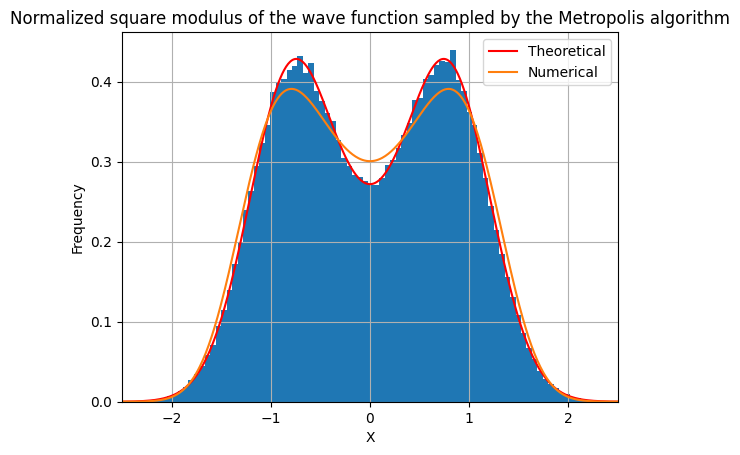

In [4]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0.8
sigma = 0.6

# Loading from file
sqr_mod = np.loadtxt('sqr_mod.dat')

# Set of x values
a = 10
N = 1000 # number of iterations
x = np.linspace(-a/2, a/2, N) # step sizes

# Modulus squared norm calculated using mathematica 
norm = 2*(1+np.exp(-mu**2/sigma**2)) *np.sqrt(np.pi)*sigma 

# Plotting the histogram
plt.hist(sqr_mod, bins=100, density= True)
plt.title('Normalized square modulus of the wave function sampled by the Metropolis algorithm')
plt.xlabel('X')
plt.ylabel('Frequency')

# Plotting the theoretical curve
plt.plot(x, (np.exp((-(x-mu)**2)/(2*sigma**2)) + np.exp((-(x+mu)**2)/(2*sigma**2)))**2/norm, color='red', label='Theoretical')

# Plotting the numerical curve
plt.plot(x,(psi[0])**2, label='Numerical')

plt.xlim((-2.5, 2.5))
plt.grid(True)
plt.legend()
plt.show()

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, I extended my Variational Monte Carlo code to face the variational optimization problem via a Simulated Annealing (SA) algorithm. I chose a starting temperature $T=1$ and I implemented the following temperature-update-law: 
$$\beta=\beta_0+1.5*i$$ 
where $i$ is the SA step.

Since I had to compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved, I chose, for every fixed set of parameters, $100$ block with $10000$ steps per block. Here I show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm. I pushed the SA steps up to $1000$.

Another important observation must be pointed out about $\delta$ of the Metropolis algorithm on parameters. I chose to decrease it with the lowering of temperature, making it possible to better sample the parameter space. The law I chose is:

$$\delta = \frac{\delta_0}{\beta}$$

where $\delta_0=1$.

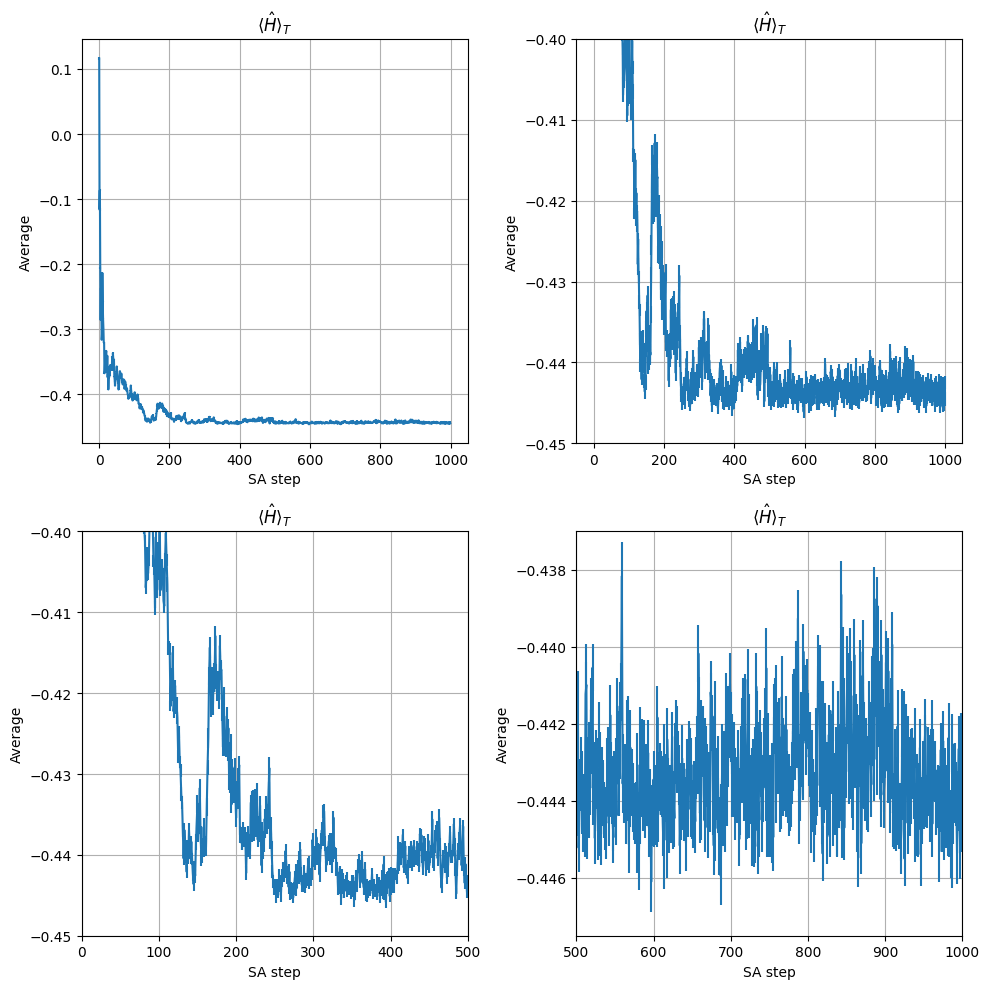

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file
a, b, c = np.loadtxt("energy.dat", usecols=(0, 1, 2), unpack=True)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# First subplot
axes[0, 0].errorbar(a, b, yerr=c)
axes[0, 0].set_xlabel('SA step')
axes[0, 0].set_ylabel('Average')
axes[0, 0].set_title(r'$\langle {\hat H} \rangle_T$')
axes[0, 0].grid()

# Second subplot with y limits
axes[0, 1].errorbar(a, b, yerr=c)
axes[0, 1].set_xlabel('SA step')
axes[0, 1].set_ylabel('Average')
axes[0, 1].set_title(r'$\langle {\hat H} \rangle_T$')
axes[0, 1].set_ylim(-0.45, -0.4)  
axes[0, 1].grid()

# Third subplot with y limits
axes[1, 0].errorbar(a, b, yerr=c)
axes[1, 0].set_xlabel('SA step')
axes[1, 0].set_ylabel('Average')
axes[1, 0].set_title(r'$\langle {\hat H} \rangle_T$')
axes[1, 0].set_ylim(-0.45, -0.4)  
axes[1, 0].set_xlim(0, 500)  
axes[1, 0].grid()

# Fourth subplot with y limits
axes[1, 1].errorbar(a, b, yerr=c)
axes[1, 1].set_xlabel('SA step')
axes[1, 1].set_ylabel('Average')
axes[1, 1].set_title(r'$\langle {\hat H} \rangle_T$')
axes[1, 1].set_ylim(-0.4475, -0.4370)  
axes[1, 1].set_xlim(500, 1000)  
axes[1, 1].grid()

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()

Here I plot the trajectory of the SA algorithm in the variational parameters space as a function of the SA steps.

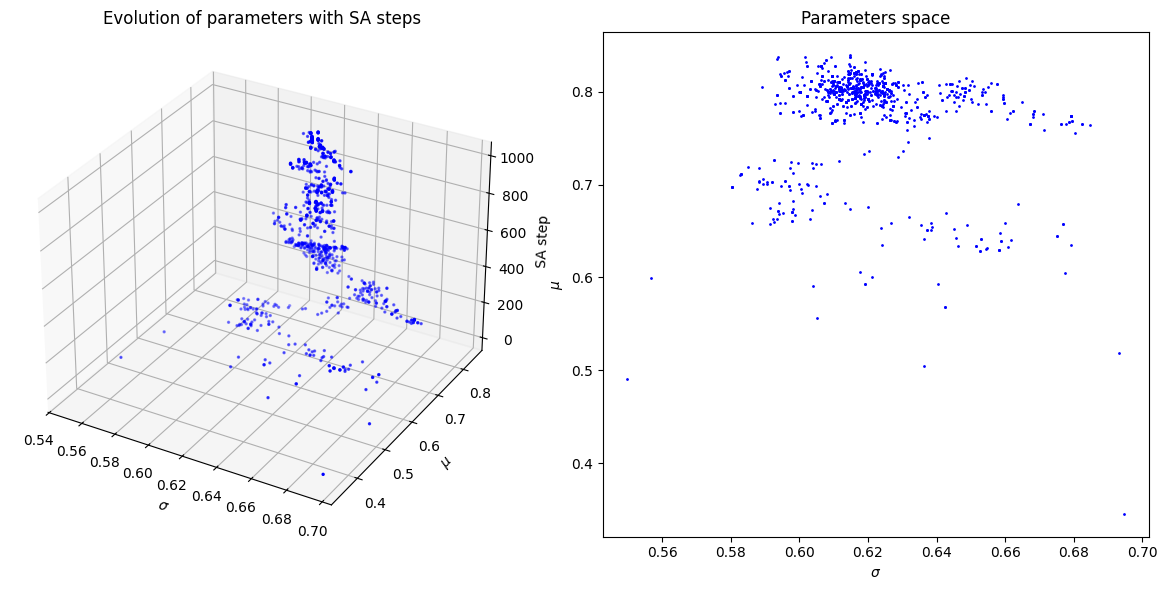

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Caricare i dati
data = np.loadtxt("parameters.dat")

# Estrazione delle colonne
x = data[:, 0]
y = data[:, 1]
z = np.arange(len(data))

# Creazione della figura e dei subplots
fig = plt.figure(figsize=(12, 6))

# Subplot 3D a sinistra
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c='b', marker='o', s=2)
ax1.set_xlabel(r'$\sigma$')
ax1.set_ylabel(r'$\mu$')
ax1.set_zlabel('SA step')
ax1.set_title('Evolution of parameters with SA steps')

# Proiezione dall'alto a destra
ax2 = fig.add_subplot(122)
ax2.scatter(x, y, c='b', marker='o', s=1)
ax2.set_xlabel(r'$\sigma$')
ax2.set_ylabel(r'$\mu$')
ax2.set_title('Parameters space')

# Mostrare il grafico
plt.tight_layout()
plt.show()

The minimum value of $\langle {\hat H} \rangle_T$ was found for $\sigma=0.616277$ and $\mu=0.793783$, yielding $E_0 \approx -0.4461 \pm 0.0008$. It's important to note that there are always fluctuations, so these parameters should not be considered unequivocally correct. In fact, I put some thought into determining the uncertainties on these parameters. As observed, the parameters converge within a small cloud as the Simulated Annealing proceeds. Moreover, once $\langle {\hat H} \rangle_T$ stabilizes (after about $600$ SA steps, as shown in the picture above), we can infer that fluctuations in the parameters are purely statistical. Therefore, I tried to fit the data with a Gaussian distribution to estimate the errors on the parameters.

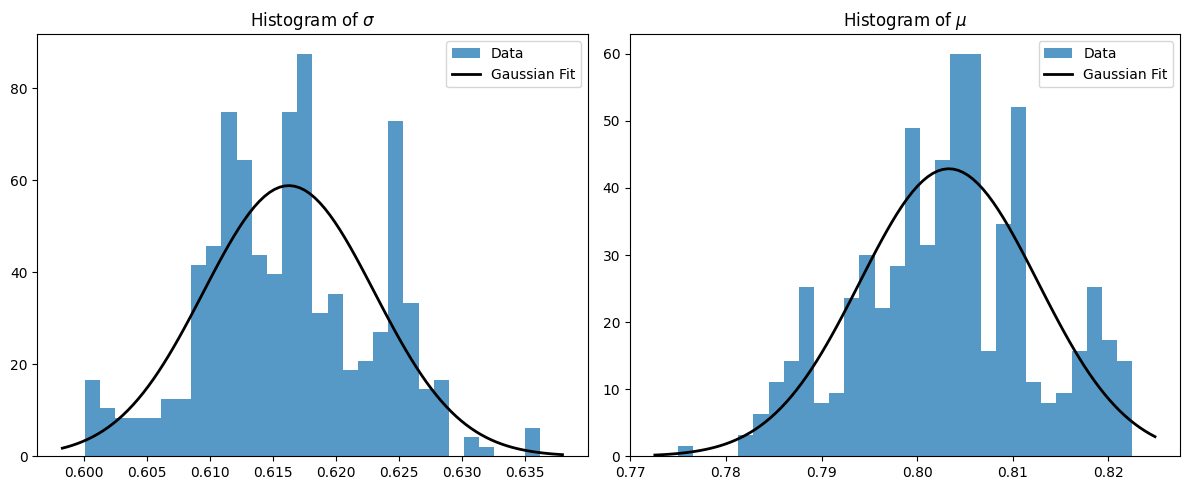

Gaussian Fit 1:
Mean: 0.6162672725
Standard Deviation: 0.00677589578493086

Gaussian Fit 2:
Mean: 0.8033260900000001
Standard Deviation: 0.009307735314613323


In [60]:
from scipy import optimize
from scipy.stats import norm

# Caricare i dati dal file parameters.dat, saltando le prime 600 righe
data = np.loadtxt("parameters.dat", skiprows=600)

# Estrazione delle colonne
colonna1 = data[:, 0]
colonna2 = data[:, 1]

# Creazione degli istogrammi
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Istogramma per la prima colonna
axs[0].hist(colonna1, bins=30, density=True, alpha=0.75, label='Data')

# Fitting con una gaussiana per la prima colonna
mean1, std_dev1 = norm.fit(colonna1)
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean1, std_dev1)
axs[0].plot(x, p, 'k', linewidth=2, label='Gaussian Fit')
axs[0].set_title(r'Histogram of $\sigma$')
axs[0].legend()

# Istogramma per la seconda colonna
axs[1].hist(colonna2, bins=30, density=True, alpha=0.75, label='Data')

# Fitting con una gaussiana per la seconda colonna
mean2, std_dev2 = norm.fit(colonna2)
xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean2, std_dev2)
axs[1].plot(x, p, 'k', linewidth=2, label='Gaussian Fit')
axs[1].set_title(r'Histogram of $\mu$')
axs[1].legend()

# Mostrare il grafico
plt.tight_layout()
plt.show()

# Stampare i parametri della gaussiana fittata
print("Gaussian Fit 1:")
print(f"Mean: {mean1}")
print(f"Standard Deviation: {std_dev1}")
print()
print("Gaussian Fit 2:")
print(f"Mean: {mean2}")
print(f"Standard Deviation: {std_dev2}")


The fit is clearly not perfect but it gives a perfectly reasonable idea about parameters error. We can finally estimate:
- $\sigma=0.616 \pm 0.007$
- $\mu = 0.803 \pm 0.009$

At last, I plotted an estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>. As already said, errors are computed with data blocking: number of blocks $N=100$, number of steps per block $M=1000$.

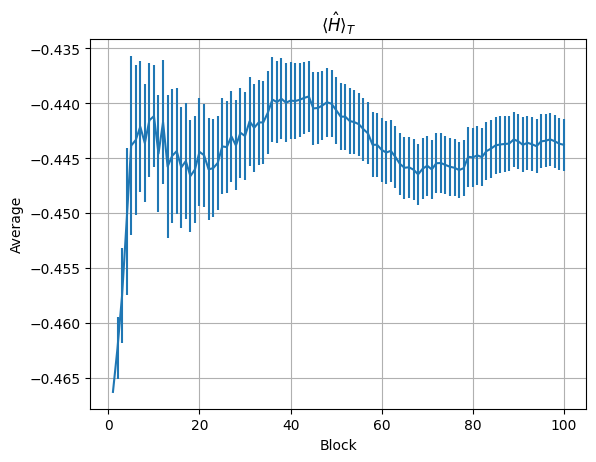

In [61]:
x, y, err = np.loadtxt("hamiltonian.dat", usecols=(0, 2, 3), unpack=True)
plt.errorbar(x,y,yerr=err)
plt.title(r'$\langle {\hat H} \rangle_T$')
plt.xlabel('Block')
plt.ylabel('Average')
plt.grid(True)
plt.show()

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331761027
2nd excited state energy:  1.971733134393021


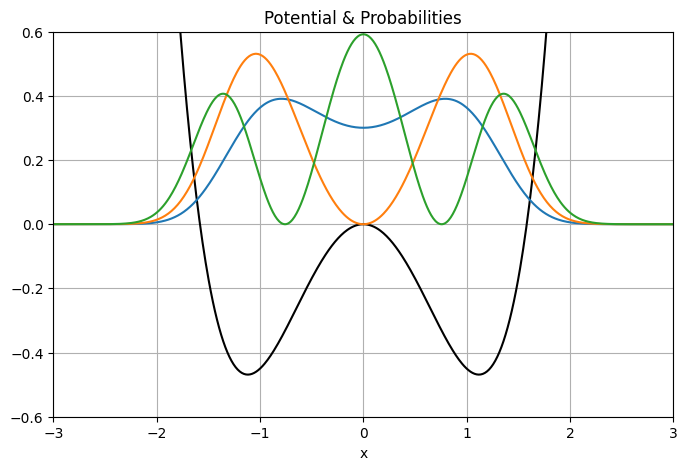

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()